Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


In [173]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline


UsageError: Line magic function `%` not found.


In [174]:
#### load the movie dataset and create their dataframes

movies_df = pd.read_csv('movies.csv')
movies_df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [175]:
movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'homepage', 'overview', 'production_companies', 'original_title', 'title_y'] from the data set as they will not be used in the analysis.

In [176]:
# code here
missing_values_count = movies_df.isnull().sum()
missing_values_count[:21]


budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

#### Remove any duplicate rows

In [177]:
# code here
movies_df.drop(movies_df.loc[:,['original_title', 'spoken_languages']],axis=1)

,budget,genres,homepage,id,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7


In [178]:
movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [179]:
# Code here
movies_df.drop(movies_df.index[movies_df['revenue'] == 0], inplace=True)
movies_df.drop(movies_df.index[movies_df['budget'] == 0], inplace=True)

In [180]:
movies_df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,"[{""id"": 35, ""name"": ""Comedy""}]",http://www.miramax.com/movie/clerks/,2292,"[{""id"": 1361, ""name"": ""salesclerk""}, {""id"": 30...",en,Clerks,Convenience and video store clerks Dante and R...,19.748658,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-09-13,3151130,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just because they serve you doesn't mean they ...,Clerks,7.4,755
4788,12000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",NaN,692,"[{""id"": 237, ""name"": ""gay""}, {""id"": 900, ""name...",en,Pink Flamingos,Notorious Baltimore criminal and underground f...,4.553644,"[{""name"": ""Dreamland Productions"", ""id"": 407}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1972-03-12,6000000,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,An exercise in poor taste.,Pink Flamingos,6.2,110
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",NaN,36095,"[{""id"": 233, ""name"": "

#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [181]:
# Change the release_date column to DateTime column
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])


# Extract the release year from every release date
movies_df['release_date'] = pd.DatetimeIndex(movies_df['release_date']).year
movies_df['release_date'].head()

0    2009
1    2007
2    2015
3    2012
4    2012
Name: release_date, dtype: int64

#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [182]:
# code here
movies_df['budget'].dtype

dtype('int64')

In [183]:
movies_df['revenue'].dtype

dtype('int64')

On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns.

In [184]:
movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [185]:
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index,movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
            
        movies_df.loc[index,column]=str(list1)
        
        
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
#parse_col_json('cast', 'name')
parse_col_json('production_countries', 'name')

movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","['United States of America', 'United Kingdom']",2009,2787965087,162.0,"['English', 'Español']",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",['United States of America'],2007,961000000,169.0,['English'],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","['United Kingdom', 'United States of America']",2015,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",['United States of America'],2012,1084939099,165.0,['English'],Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",['United States of America'],2012,284139100,132.0,['English'],Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [186]:
'''def parse_col_json(df, column, key, nested):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    import json
    for index, i in zip(df.index, df[column].apply(json.loads)):
        list1 = []
        for j in range(len(i)):
            if nested:
                if not(((i[j]["department"] == "Directing") and (i[j]["job"] == "Director"))):
                    continue
            name = i[j][key]
            if "," in name:
                name = name.replace(",", " ")
            if " " in name:
                name = name.replace(" ", "")
            list1.append(name)  # the key 'name' contains the name of the genre

        df.loc[index, column] = str(list1)

parse_col_json(movies_df, 'genres', 'name', False)
parse_col_json(movies_df, 'spoken_languages', 'name', False)
#parse_col_json('cast', 'name') # removed - no column for cast
parse_col_json(movies_df, 'production_countries', 'name', False)
parse_col_json(movies_df, 'keywords', 'name', False)
parse_col_json(movies_df, 'production_companies', 'name', False)
#parse_col_json(movies_df, 'spoken_languages', 'name', False)

movies_df.head()'''

'def parse_col_json(df, column, key, nested):\n    """\n    Args:\n        column: string\n            name of the column to be processed.\n        key: string\n            name of the dictionary key which needs to be extracted\n    """\n    import json\n    for index, i in zip(df.index, df[column].apply(json.loads)):\n        list1 = []\n        for j in range(len(i)):\n            if nested:\n                if not(((i[j]["department"] == "Directing") and (i[j]["job"] == "Director"))):\n                    continue\n            name = i[j][key]\n            if "," in name:\n                name = name.replace(",", " ")\n            if " " in name:\n                name = name.replace(" ", "")\n            list1.append(name)  # the key \'name\' contains the name of the genre\n\n        df.loc[index, column] = str(list1)\n\nparse_col_json(movies_df, \'genres\', \'name\', False)\nparse_col_json(movies_df, \'spoken_languages\', \'name\', False)\n#parse_col_json(\'cast\', \'name\') # remo

### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

In [187]:
# Code here

#Most expensive movies
movie_expense_df = movies_df.loc[:,['title', 'budget', 'revenue', 'vote_count', 'vote_average', 'popularity']] # Selecting my columns
movie_expense_df.sort_values(by=['budget'],ascending=False).head() # Displaying the five most expensive movies based on budget


,title,budget,revenue,vote_count,vote_average,popularity
17,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802,4948,6.4,135.413856
1,Pirates of the Caribbean: At World's End,300000000,961000000,4500,6.9,139.082615
7,Avengers: Age of Ultron,280000000,1405403694,6767,7.3,134.279229
10,Superman Returns,270000000,391081192,1400,5.4,57.925623
4,John Carter,260000000,284139100,2124,6.1,43.926995


In [188]:
# Cheapest movie
movie_expense_df.sort_values(by=['budget'],ascending=True).head()

,title,budget,revenue,vote_count,vote_average,popularity
4238,Modern Times,1,8500000,856,8.1,28.276480
3611,A Farewell to Arms,4,25,28,6.2,1.199451
3372,Split Second,7,5,63,5.7,4.857028
3419,Bran Nue Dae,7,7,6,5.2,0.050456
4608,The Prophecy,8,16,138,6.4,11.818333


#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [189]:
# code here

movie_profit_df = movies_df.loc[:,['title', 'budget', 'revenue',]] # Selecting my columns
movie_profit_df['profit'] = movie_profit_df['revenue'] - movie_profit_df['budget']
movie_profit_df.sort_values(by=['profit'],ascending=False).head()


,title,budget,revenue,profit
0,Avatar,237000000,2787965087,2550965087
25,Titanic,200000000,1845034188,1645034188
28,Jurassic World,150000000,1513528810,1363528810
44,Furious 7,190000000,1506249360,1316249360
16,The Avengers,220000000,1519557910,1299557910


In [190]:
movie_profit_df.sort_values(by=['profit'],ascending=True).head()

,title,budget,revenue,profit
13,The Lone Ranger,255000000,89289910,-165710090
338,The Alamo,145000000,25819961,-119180039
141,Mars Needs Moms,150000000,38992758,-111007242
208,The 13th Warrior,160000000,61698899,-98301101
311,The Adventures of Pluto Nash,100000000,7103973,-92896027


#### Find the most talked about movies. Sort the dataframe based on the popularity column.

#### Find Movies which are rated above 7



In [191]:
# Code here
movie_rating_df = movies_df.loc[:,['title', 'vote_count', 'vote_average',]]
movie_rating_df = movie_rating_df.loc[movie_rating_df['vote_average'] > 7]
movie_rating_df.head()



,title,vote_count,vote_average
0,Avatar,11800,7.2
3,The Dark Knight Rises,9106,7.6
6,Tangled,3330,7.4
7,Avengers: Age of Ultron,6767,7.3
8,Harry Potter and the Half-Blood Prince,5293,7.4


#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well. These are preliminary questions which give rise to questions providing deeper insights.

In [192]:
# Code here
movie_year_profit_df = movies_df.loc[:,['title', 'budget', 'revenue','release_date']] # Selecting my columns
movie_year_profit_df['profit'] = movie_profit_df['revenue'] - movie_profit_df['budget']
movie_year_profit_df.sort_values(by=['profit'], ascending=False).head(10)

,title,budget,revenue,release_date,profit
0,Avatar,237000000,2787965087,2009,2550965087
25,Titanic,200000000,1845034188,1997,1645034188
28,Jurassic World,150000000,1513528810,2015,1363528810
44,Furious 7,190000000,1506249360,2015,1316249360
16,The Avengers,220000000,1519557910,2012,1299557910
7,Avengers: Age of Ultron,280000000,1405403694,2015,1125403694
124,Frozen,150000000,1274219009,2013,1124219009
546,Minions,74000000,1156730962,2015,1082730962
329,The Lord of the Rings: The Return of the King,94000000,1118888979,2003,1024888979
31,Iron Man 3,200000000,1215439994,2013,1015439994


In [193]:
movie_year_profit_df.sort_values(by=['profit'], ascending=True).head(10)

,title,budget,revenue,release_date,profit
13,The Lone Ranger,255000000,89289910,2013,-165710090
338,The Alamo,145000000,25819961,2004,-119180039
141,Mars Needs Moms,150000000,38992758,2011,-111007242
208,The 13th Warrior,160000000,61698899,1999,-98301101
311,The Adventures of Pluto Nash,100000000,7103973,2002,-92896027
2638,Metropolis,92620000,650422,1927,-91969578
340,Cutthroat Island,98000000,10017322,1995,-87982678
142,Flushed Away,149000000,64459316,2006,-84540684
192,Australia,130000000,49554002,2008,-80445998
272,Town & Country,90000000,10372291,2001,-79627709


#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

In [194]:
 # Code here
movie_genres_profit_df = movies_df.loc[:,['title', 'budget', 'revenue','genres']]
movie_genres_profit_df['profit'] = movie_profit_df['revenue'] - movie_profit_df['budget']
movie_genres_profit_df.sort_values(by=['profit'], ascending=False).head(5)

,title,budget,revenue,genres,profit
0,Avatar,237000000,2787965087,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",2550965087
25,Titanic,200000000,1845034188,"['Drama', 'Romance', 'Thriller']",1645034188
28,Jurassic World,150000000,1513528810,"['Action', 'Adventure', 'Science Fiction', 'Th...",1363528810
44,Furious 7,190000000,1506249360,['Action'],1316249360
16,The Avengers,220000000,1519557910,"['Science Fiction', 'Action', 'Adventure']",1299557910


<BarContainer object of 10 artists>

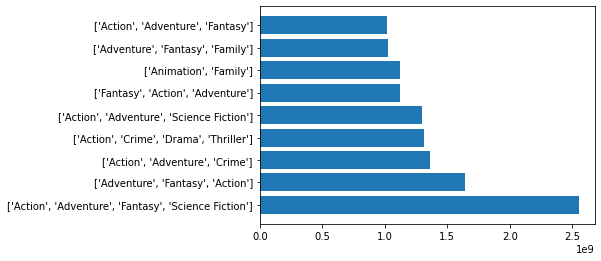

In [207]:
# Selecting the data for bar plot
genres = movie_genres_profit_df['genres']
profit = movie_year_profit_df['profit'].sort_values(ascending=False)

fig, ax = plt.subplots()
ax.barh(genres.iloc[:10,],profit.iloc[:10,],)

#ax.get_xticks(rotation=90)


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

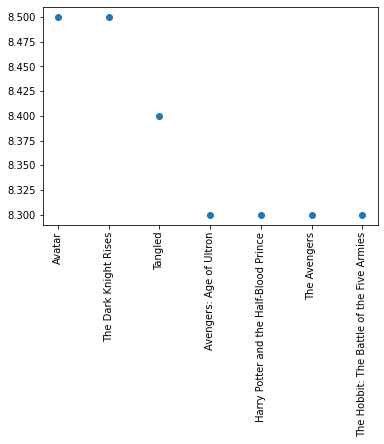

In [227]:
#### Generate three different interesting visualisations with a data story.

# Most Popular movie
#movie_rating_df.head()

rating = movie_rating_df['vote_average'].sort_values(ascending=False)
movie = movie_rating_df['title']
count = movie_rating_df['vote_count']

fig,ax = plt.subplots()
ax.scatter(movie.iloc[:7,],rating.iloc[:7,])
plt.xticks(rotation=90)


<AxesSubplot:xlabel='title'>

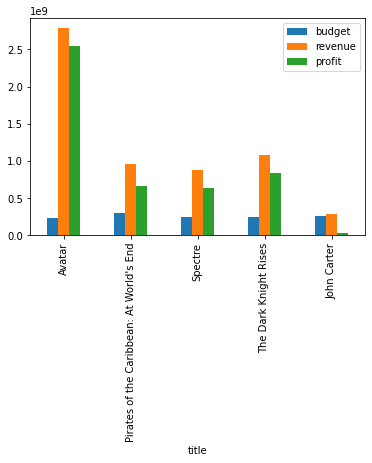

In [258]:
# Movies budget vs revenue
movie_profit_df.head()
movie_profit_df = movie_profit_df.iloc[:5,]

movie = movie_profit_df['title'].iloc[:5,]
budget = movie_profit_df['budget']
revenue = movie_profit_df['revenue']
profit = movie_profit_df['profit']

plot_budget_revenue = pd.DataFrame({
    'budget': movie_profit_df['budget'],
    'revenue': movie_profit_df['revenue'],
    'profit': movie_profit_df['profit'] 
},)

#plot_budget_revenue = plot_budget_revenue.iloc[:5,]
#plot
#plot_budget_revenue.plot(kind='bar', figsize=(12,7))
movie_profit_df.plot(kind='bar', x='title')


<AxesSubplot:title={'center':'Number of movies recorded per year'}, xlabel='release_date'>

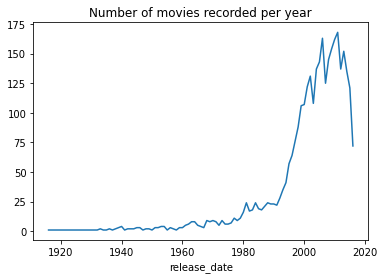

In [262]:
# Timeline of budget vs revenue, how much money has been circulating since time began
movie_year_profit_df.iloc[:5,]
year_money = movie_year_profit_df.groupby(movie_year_profit_df['release_date']).size()
year_money.plot(title="Number of movies recorded per year")

# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualisations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)